In this example you will learn how to apply PCA to reduce the dimensionality of a 13-dimensional wine data set. You can apply this technique to visualize high-dimensional data as well as to optimize performance.

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

# Load the Wine Quality data set

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
X = df.iloc[: ,:13]
y = df['target']

column_names = df.columns
column_names = column_names.to_list()

**Step: Explore the data set**
Before initiating data preprocessing, you should conduct an exploratory data analysis to understand the data's structure and format, including the types of variables, their distributions, and the overall organization of information. This helps you determine whether PCA is necessary to model the data.

You can start by understanding the shape of the data set, which lets you see that you have a 13-dimensional data set. You can explore further to see whether any of the features are correlated to one another, which indicates a potential need for dimensionality reduction.



In [2]:
df.shape

(178, 14)

Some visualizations that you might want to use to explore the data include pair plots, histograms, and correlation heatmaps. Because this is a higher dimensional data set, some visualizations are more effective than others at highlighting correlations between variables.

### Pair plots
Given the number of dimensions in this data set, pair plots might not be the most effective visualization to identify correlations between data.

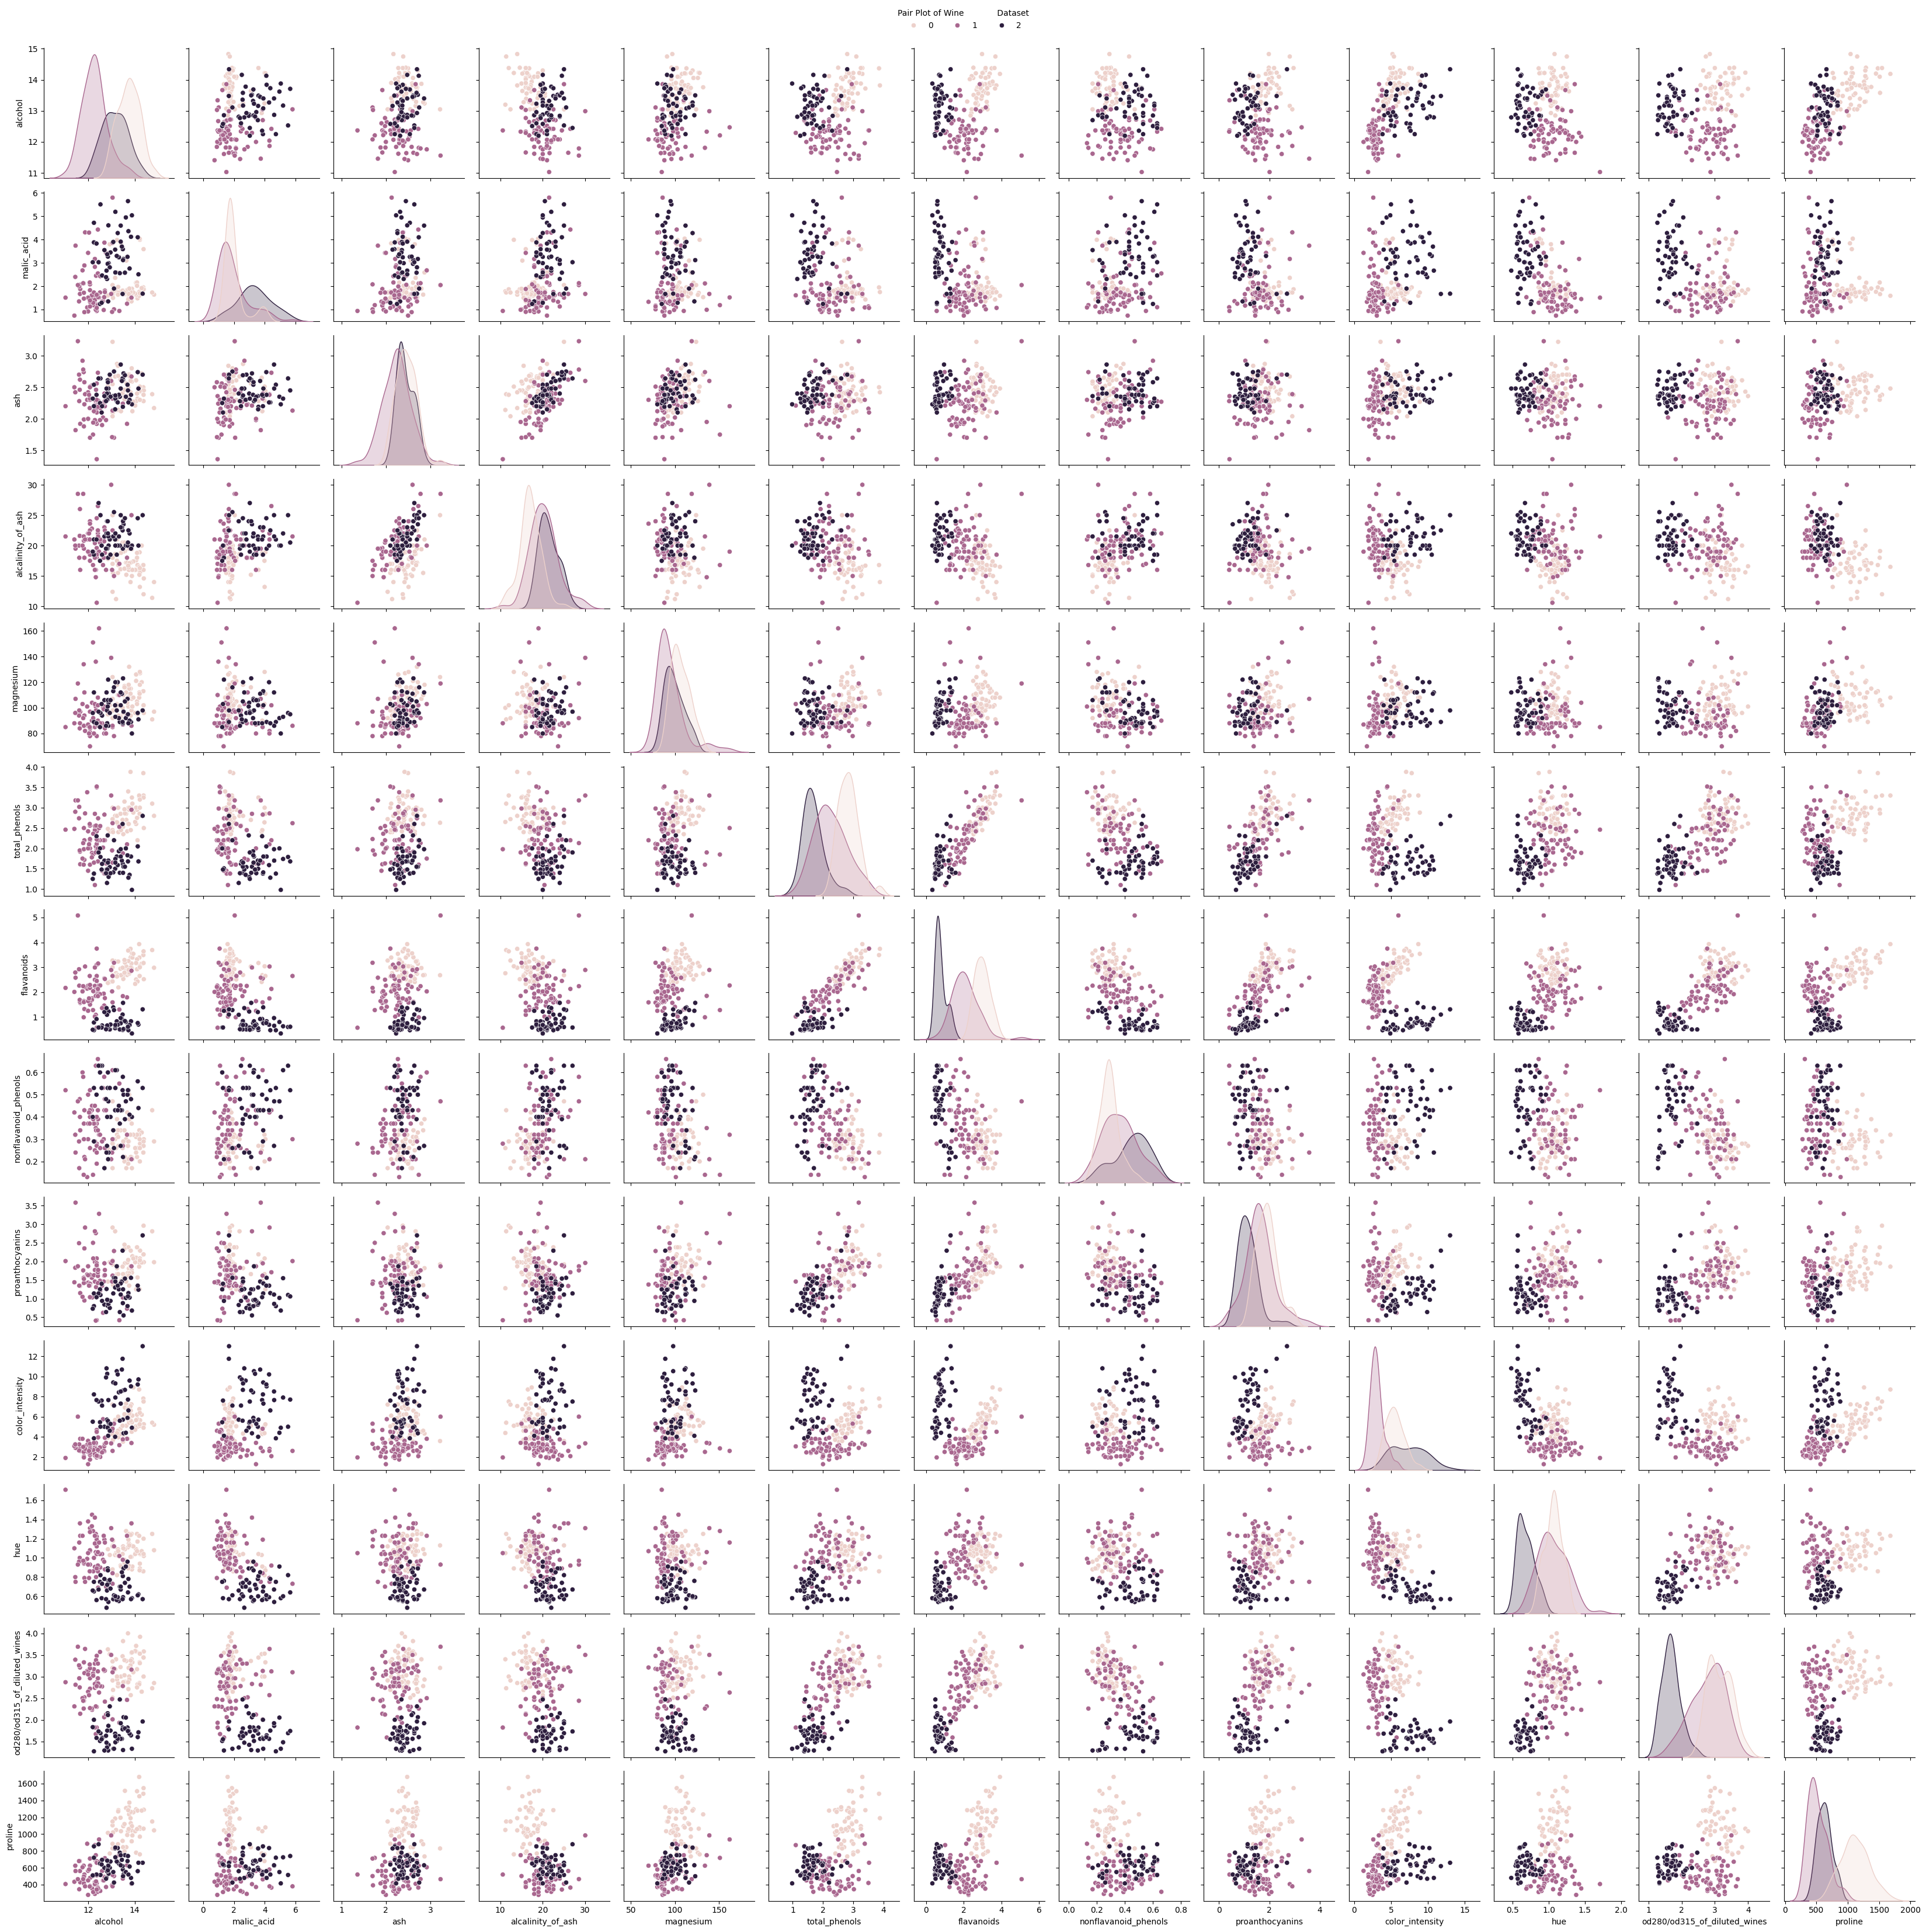

In [3]:
ax = sns.pairplot(df, hue='target')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Pair Plot of Wine             Dataset", frameon=False)

plt.tight_layout()
plt.show()

While you can see distributions and the direction of any correlation between classes by feature, it can be hard to read the data labels without zooming in, making the interpretation of the visualization more difficult.

### Histograms
Histograms show you the distributions of the different features for each category of wine.



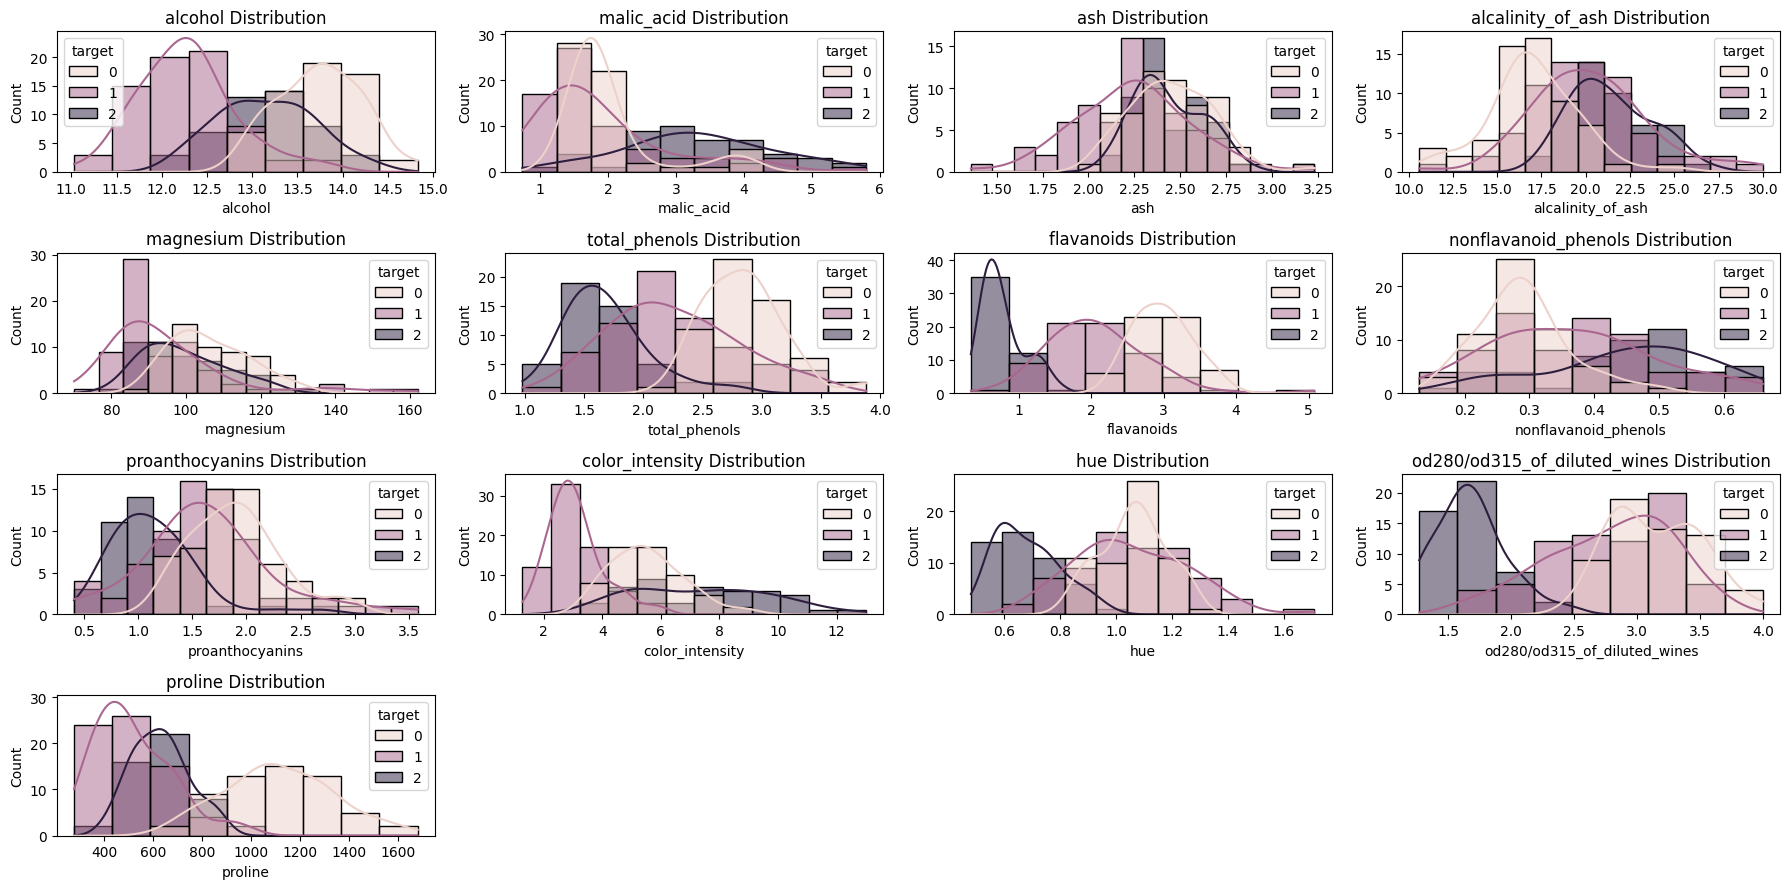

In [4]:
# Visualize the distribution of each feature using histograms.
plt.figure(figsize=(18, 9))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=feature, hue='target', kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

Here, you can see a similar distribution of data by type for the following features: ash, alkalinity of ash, and magnesium.

### Correlation heatmaps
Correlation heatmaps might be the most helpful in identifying positive and negative correlations between attributes.

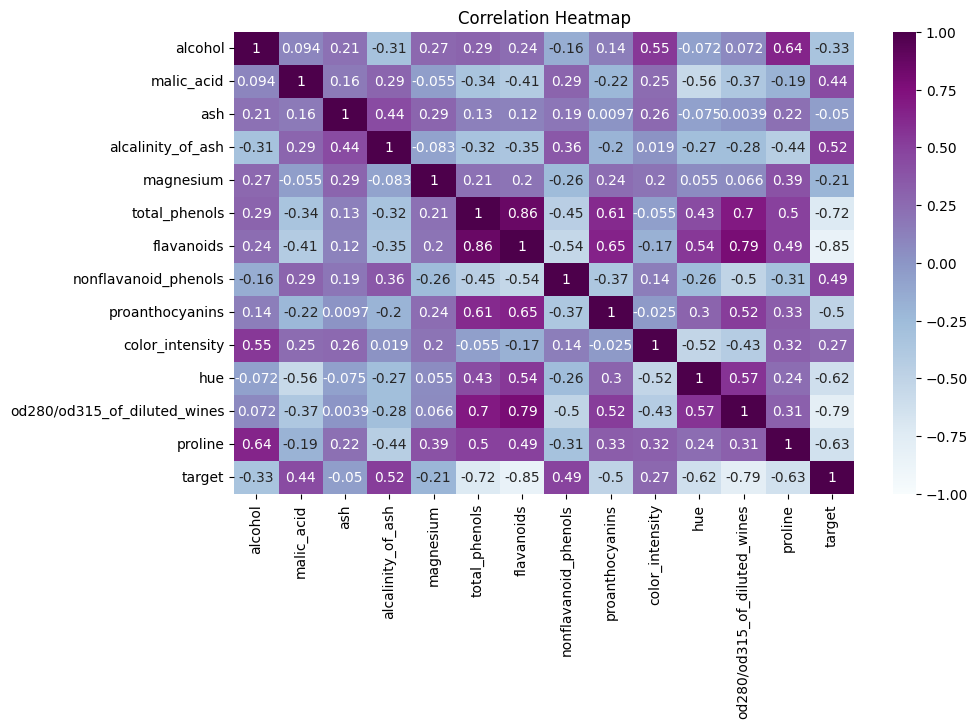

In [5]:
# Note issue with older version of seaborn: https://github.com/mwaskom/seaborn/issues/3478

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

Darker cells indicate positive correlation whereas light gray/white cells signal negative correlation between features. For example, you can see a high positive correlation between flavonoids and total phenols at 86%.

**Step  . Split the data set**
Given the exploratory analysis, you can conclude that there are some correlated features within the data set, and that the model might benefit from PCA to reduce the number of dimensions in the data.

From here, you split the data set into two sets, a training set and the test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Step: Standardize data points through feature scaling**
Next, you standardize the data by scaling and centering it to have a mean of zero and a standard deviation of one. This is a common practice when implementing PCA because this approach is affected by variables with different scales. Without this standardization, PCA might place more weight to variables with larger scales, incorrectly attributing more importance to them.

In [7]:
#scaling and centering the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

**Step: Determine the optimal value for the n_components parameter**
There are a few different ways that you can determine the ideal value for the `n_components` parameter to apply PCA effectively. Through two popular data visualizations, you can identify the optimal number of principal components to capture the most information from the original data set.

The first data visualization is a plot of the explained variance percentage of individual components and the percentage of total variance that is captured by all principal components.



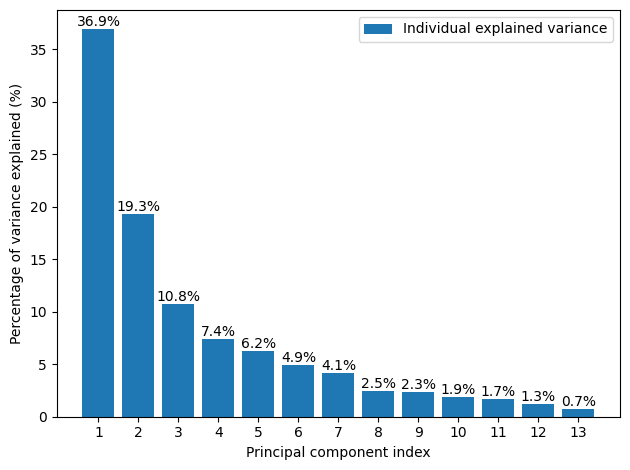

In [8]:
# calculate covariance matrix, eigenvalues and eigenvectors
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Sort the eigenvalues in descending order
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range(1, 14), exp_var, align='center',
        label='Individual explained variance')

# Adding data labels to the top of bars
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%',
             ha='center', va='bottom')

plt.ylabel('Percentage of variance explained (%)')
plt.xlabel('Principal component index')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

you're looking for the number of components that explain most of the variance in the data. You might want to choose the number of components that explain 80-90% of the variation to ensure that you're capturing the most information from the initial data set. By choosing five components, 83.6% of the variance would be explained from the initial data set.



The second data visualization is a scree plot.

---
Here, you're looking for the point at which the line "elbows." The visualization here suggests that two or three principal components might be ideal.


Text(0.5, 1.0, 'Scree Plot')

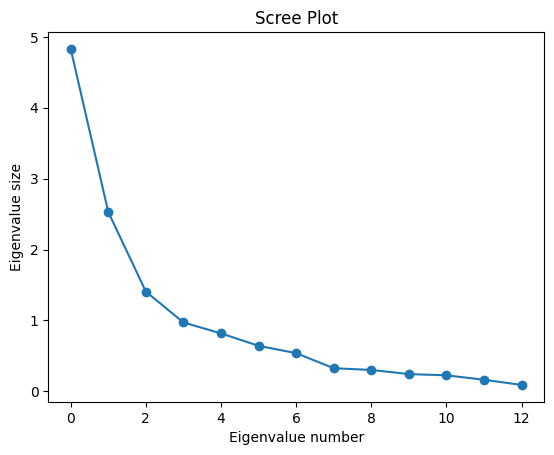

In [9]:
# generate scree plot
pca = PCA()
X_train = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

Through some visual inspection of these two plots, you'll use two principal components, but through trial and error, you can test which number of components yields the best results as well.

**Step: Apply PCA to the scaled training data**
Now that you know the subset of components that you'll select, you can proceed with applying PCA to the data set. In this step, you are applying an orthogonal transformation to create a linear combination of the features from the original data set. While you could incorporate more principal components, two principal components capture most (56.2%) of the variance in the data set. Because this isn't the ideal 80-90% of variation that you typically look for, it's worth noting that you lose some information from the original data set.

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df
final_pca_df['target'] = y_train

**Step: Visualize the output**
You use a scatter plot to plot and visualize the principal components, which provides a 2-dimensional view of the original 13-dimensional data set.

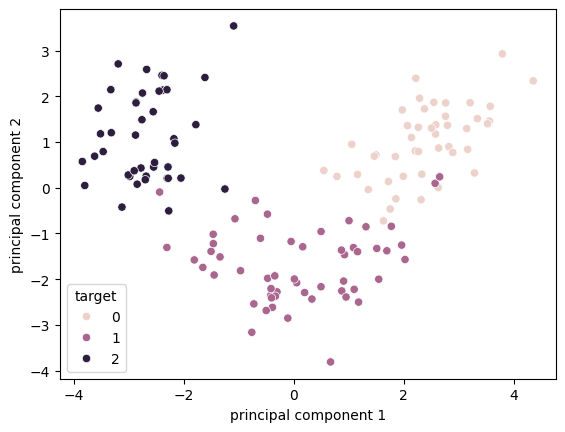

In [11]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
hue = 'target',
data=final_pca_df,
legend=True)
plt.show()

you can also observe the class separation between the different types of wine in the data set within the projected data.